# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [38]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [39]:
df_obesity = pd.read_csv("Datasets/obesity_cleaned.csv")

In [40]:
df_obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [41]:
df_obesity['Obesity (%)'].iloc[0]

'0.5 [0.2-1.1]'

In [42]:
df_obesity['Obesity (%)'].value_counts()

Obesity (%)
No data            504
0.4 [0.1-1.0]       55
0.6 [0.2-1.3]       47
0.3 [0.1-0.7]       46
0.3 [0.1-0.8]       46
                  ... 
9.5 [6.7-13.1]       1
4.4 [2.2-7.6]        1
14.1 [9.1-20.3]      1
9.8 [6.9-13.4]       1
4.7 [2.5-8.0]        1
Name: count, Length: 16375, dtype: int64

In [43]:
df_obesity.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [44]:
del df_obesity['Unnamed: 0']

In [45]:
df_obesity

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [46]:
df_obesity.columns

Index(['Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [47]:
df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split()[0])

In [48]:
df_obesity['Obesity']

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24570, dtype: object

In [49]:
df_obesity['Obesity'].value_counts()

Obesity
No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
60.1      1
56.3      1
59.8      1
55.5      1
46.5      1
Name: count, Length: 602, dtype: int64

In [50]:
df_obesity.loc[df_obesity['Obesity'] == 'No']

,Country,Year,Obesity (%),Sex,Obesity
14112,Monaco,1975,No data,Both sexes,No
14113,Monaco,1975,No data,Male,No
14114,Monaco,1975,No data,Female,No
14115,Monaco,1976,No data,Both sexes,No
14116,Monaco,1976,No data,Male,No
...,...,...,...,...,...
20911,Sudan,2015,No data,Male,No
20912,Sudan,2015,No data,Female,No
20913,Sudan,2016,No data,Both sexes,No
20914,Sudan,2016,No data,Male,No


In [51]:
df_obesity.loc[df_obesity['Obesity'] == 'No', 'Obesity'] = np.nan
df_obesity.head()

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2


In [52]:
df_obesity.loc[pd.isna(df_obesity['Obesity'])]

,Country,Year,Obesity (%),Sex,Obesity
14112,Monaco,1975,No data,Both sexes,NaN
14113,Monaco,1975,No data,Male,NaN
14114,Monaco,1975,No data,Female,NaN
14115,Monaco,1976,No data,Both sexes,NaN
14116,Monaco,1976,No data,Male,NaN
...,...,...,...,...,...
20911,Sudan,2015,No data,Male,NaN
20912,Sudan,2015,No data,Female,NaN
20913,Sudan,2016,No data,Both sexes,NaN
20914,Sudan,2016,No data,Male,NaN


In [53]:
df_obesity

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [54]:
df_obesity['Obesity'] = df_obesity['Obesity'].dropna()

In [55]:
df_obesity['Obesity'].value_counts()

Obesity
0.4     222
0.6     218
0.5     217
0.7     210
0.8     201
       ... 
62.1      1
56.8      1
54.1      1
60.0      1
46.5      1
Name: count, Length: 601, dtype: int64

In [56]:
df_obesity['Obesity'] = df_obesity['Obesity'].apply(lambda x: float(x))
df_obesity['Year'] = df_obesity['Year'].apply(lambda x: int(x))

In [57]:
print(df_obesity.dtypes)

Country         object
Year             int64
Obesity (%)     object
Sex             object
Obesity        float64
dtype: object


In [58]:
df_obesity.set_index('Year', inplace=True)

In [59]:
df_obesity

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [65]:
df_obesity[df_obesity.index == 2015].groupby('Sex')[['Obesity']].mean()

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [66]:
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

In [67]:
df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]

In [68]:
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [69]:
df_obesity_ev.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [70]:
df_2015 = df_obesity[df_obesity.index == 2015].copy()
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [71]:
df_2015 = df_obesity[df_obesity.index == 2015].copy()
df_2015[df_2015["Obesity"] == df_2015["Obesity"].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [72]:
df_brasil = df_obesity[df_obesity["Country"] == "Brazil"]

<Axes: xlabel='Year'>

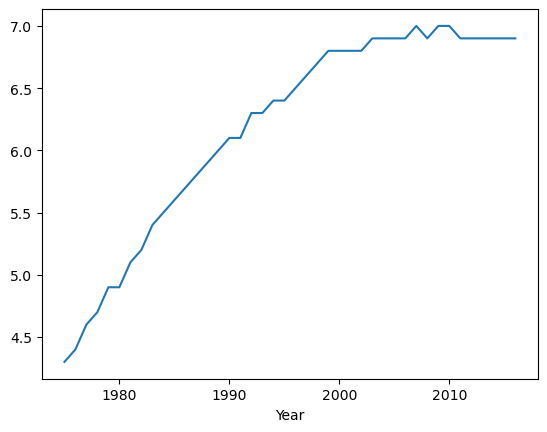

In [75]:
(df_brasil[df_brasil["Sex"] == "Female"]["Obesity"] - df_brasil[df_brasil["Sex"] == "Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [76]:
all_countries = df_obesity["Country"].value_counts()
df_both = df_obesity[df_obesity["Sex"] == "Both sexes"]
df_both = df_both.groupby("Year")["Obesity"].mean()

<Axes: xlabel='Year'>

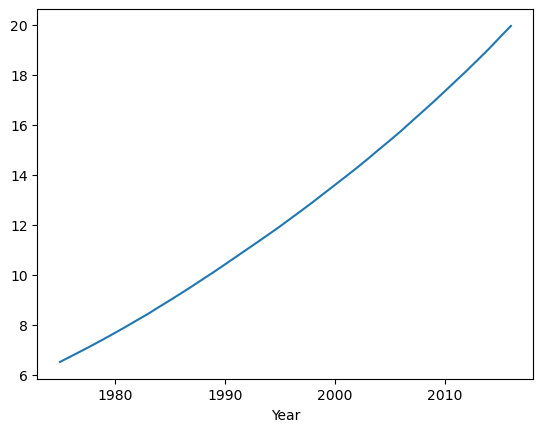

In [77]:
df_both.plot()

## Perguntas - GDP Per Person (1901-2011)

In [ ]:
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

- Você conseguiria informar o primeiro valor registrado de cada país?

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?